In [1]:
!pip install opencv-python
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf
import keras
import glob as gb
import cv2

In [3]:
train_path='cnn_img/seg_train/'
test_path='cnn_img/seg_test/'
pred_path='cnn_img/seg_pred/'

In [4]:
for folder in os.listdir(train_path + 'seg_train'):
    file=gb.glob(pathname=str(train_path +'seg_train/' + folder +'/*.jpg'))
    print(f'for training data, found {len(file)} in folder {folder}')

for training data, found 70 in folder buildings
for training data, found 70 in folder forest
for training data, found 70 in folder glacier
for training data, found 60 in folder mountain
for training data, found 90 in folder sea
for training data, found 80 in folder street


In [5]:
for folder in os.listdir(test_path + 'seg_test'):
    file=gb.glob(pathname=str(test_path +'seg_test/' + folder +'/*.jpg'))
    print(f'for testing data, found {len(file)} in folder {folder}')

for testing data, found 100 in folder buildings
for testing data, found 80 in folder forest
for testing data, found 90 in folder glacier
for testing data, found 90 in folder mountain
for testing data, found 80 in folder sea
for testing data, found 120 in folder street


In [6]:
file=gb.glob(pathname=str(pred_path +'seg_pred/*.jpg'))
print(f'for predictiom data, found {len(file)} ')

for predictiom data, found 90 


In [7]:
size=[]
for folder in os.listdir(train_path + 'seg_train'):
    file=gb.glob(pathname=str(train_path +'seg_train/' + folder +'/*.jpg'))
    for image in file :
        img=plt.imread(image)
        size.append(img.shape)
pd.Series(size).value_counts()

(150, 150, 3)    438
(113, 150, 3)      1
(140, 150, 3)      1
Name: count, dtype: int64

In [8]:
size=[]
for folder in os.listdir(test_path + 'seg_test'):
    file=gb.glob(pathname=str(test_path +'seg_test/' + folder +'/*.jpg'))
    for image in file :
        img=plt.imread(image)
        size.append(img.shape)
pd.Series(size).value_counts()

(150, 150, 3)    560
Name: count, dtype: int64

size=[]

file=gb.glob(pathname=str(pred_path +'seg_pred/*.jpg'))
for image in file :
    img=plt.imread(image)
    size.append(img.shape)
pd.Series(size).value_counts()

In [9]:
code={'buildings':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n):
    for x,y in code.items():
        if n==y:
            return x

In [10]:
getcode(5)

'street'

Reading_data

In [11]:
x_train=[]
y_train=[]
for folder in os.listdir(train_path + 'seg_train'):
    file=gb.glob(pathname=str(train_path +'seg_train/' + folder +'/*.jpg'))
    for image in file :
        img=cv2.imread(image)
        resized_img=cv2.resize(img,(100,100))
        x_train.append(resized_img)
        y_train.append(code[folder])

In [12]:
set(y_train)

{0, 1, 2, 3, 4, 5}

In [13]:
x_test=[]
y_test=[]
for folder in os.listdir(test_path + 'seg_test'):
    file=gb.glob(pathname=str(test_path +'seg_test/' + folder +'/*.jpg'))
    for image in file :
        img=cv2.imread(image)
        resized_img=cv2.resize(img,(100,100))
        x_test.append(resized_img)
        y_test.append(code[folder])

In [14]:
x_pred=[]

file=gb.glob(pathname=str(pred_path +'seg_pred/*.jpg'))
for image in file :
    img=cv2.imread(image)
    resized_img=cv2.resize(img,(100,100))
    x_pred.append(resized_img)

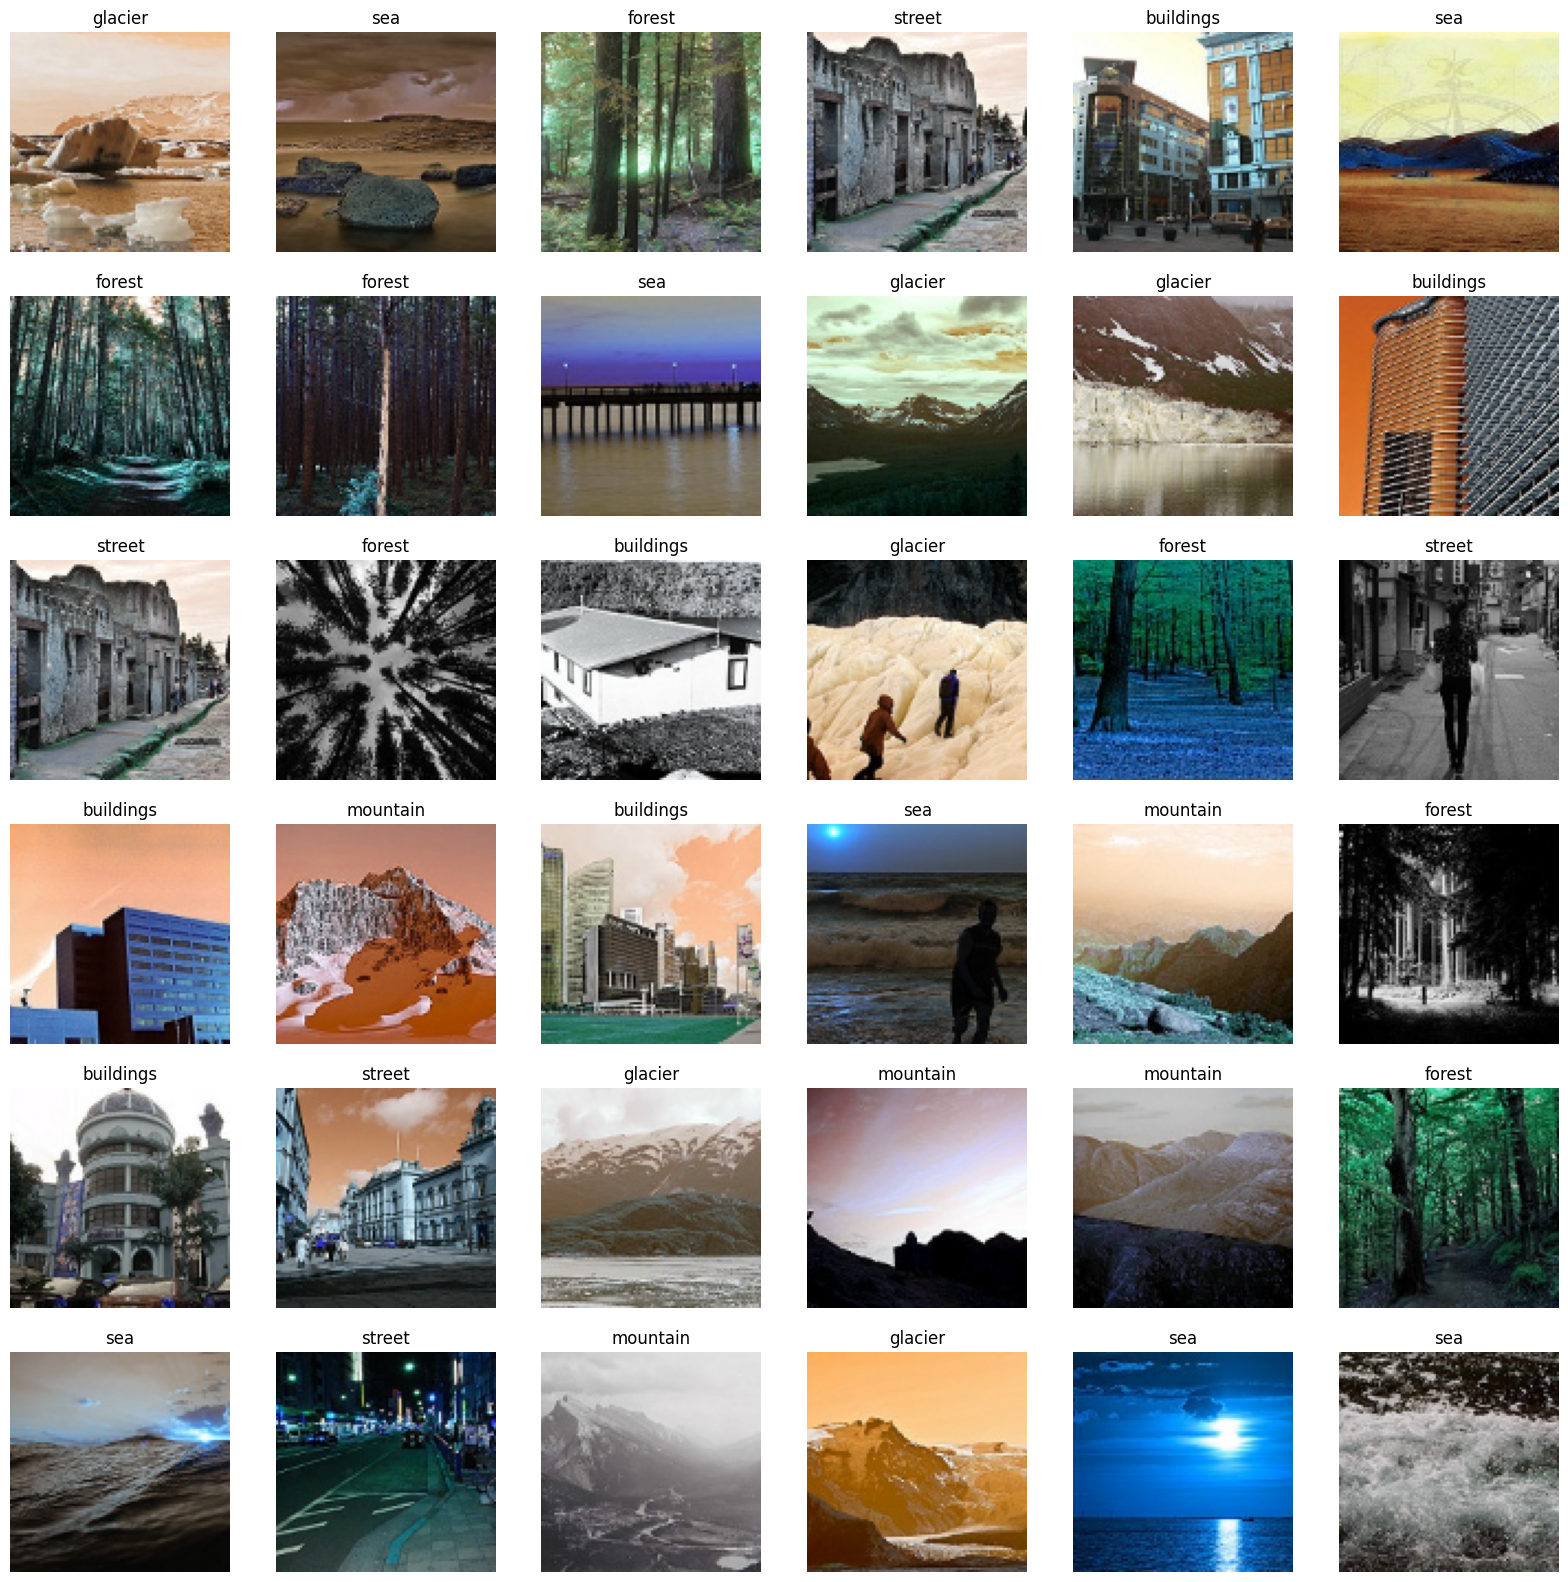

In [15]:
plt.figure(figsize=(20,20))

for n,i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [16]:
x_train=np.array(x_train)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_test=np.array(y_test)

x_pred=np.array(x_pred)

#CNN

In [17]:
model=keras.models.Sequential([
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(rate=.2),
    keras.layers.Dense(6,activation='softmax')
])

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 150)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                                        

In [21]:
final_model=model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
7/7 [==============================] - 28s 4s/step - loss: 2.3195 - accuracy: 0.2136
Epoch 2/20
7/7 [==============================] - 29s 4s/step - loss: 1.7705 - accuracy: 0.1886
Epoch 3/20
7/7 [==============================] - 28s 4s/step - loss: 1.6587 - accuracy: 0.2432
Epoch 4/20
7/7 [==============================] - 28s 4s/step - loss: 1.6517 - accuracy: 0.2886
Epoch 5/20
7/7 [==============================] - 28s 4s/step - loss: 1.5413 - accuracy: 0.3182
Epoch 6/20
7/7 [==============================] - 28s 4s/step - loss: 1.4119 - accuracy: 0.4341
Epoch 7/20
7/7 [==============================] - 28s 4s/step - loss: 1.3668 - accuracy: 0.4318
Epoch 8/20
7/7 [==============================] - 27s 4s/step - loss: 1.3026 - accuracy: 0.4818
Epoch 9/20
7/7 [==============================] - 26s 4s/step - loss: 1.2362 - accuracy: 0.5023
Epoch 10/20
7/7 [==============================] - 26s 4s/step - loss: 1.1627 - accuracy: 0.5250
Epoch 11/20
7/7 [======================

In [22]:
loss,accuracy=model.evaluate(x_test,y_test)

18/18 [==============================] - 9s 485ms/step - loss: 1.1834 - accuracy: 0.5821


In [23]:
print(f'loss = {loss}')
print(f'accuracy = {accuracy}')

loss = 1.1833641529083252
accuracy = 0.5821428298950195


In [24]:
Labels =['buildings','forest','glacier','mountain','sea','street']


In [27]:
y_hat = model.predict(x_test)


figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    #
    ax.set_title("{} ({})".format(Labels[predict_index], 
                                  Labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

14/18 [======================>.......] - ETA: 1s